In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [5]:
df=pd.read_csv("heartt.csv",header=0)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [7]:
feature_cols=['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exanf','oldpeak','slope','ca','thal']

In [8]:
print(df.dtypes)

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [9]:
print(df.isnull().any())

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool


In [10]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [11]:
print(x)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [12]:
print(y)
x,y=shuffle(x,y)
print("----------------------------------------------------------------------------")
print(y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64
----------------------------------------------------------------------------
294    0
183    0
93     1
56     1
134    1
      ..
68     1
256    0
216    0
125    1
291    0
Name: target, Length: 303, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

In [14]:
x_scale=StandardScaler()

In [15]:
X=x_scale.fit_transform(x)
x=X
from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,random_state=None)
for train_index,test_index in skf.split(x,y):
    #print("train:",train_index,"validation",test_index)
    x_train,x_test=x[train_index],x[test_index]
    y_train,y_test=y[train_index],y[test_index]


In [16]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25,random_state=43)#ytest-actual result

In [17]:
# NAIVE BAYE'S CLASSIFIER

In [18]:
classifier=GaussianNB()
classifier.fit(X_train,Y_train)
y_predict=classifier.predict(X_test)
#print(y_predict)

for i in range(len(y_predict)):
    if y_predict[i]==1:
        print(i," yes")
    else:
        print(i," no")
        
nb_acc=metrics.accuracy_score(Y_test, y_predict)        
cm=confusion_matrix(Y_test, y_predict)

print("--------------------------------------------------------------------------------------------------------")        
print("Accuracy of NB:",nb_acc) 
print("confusion matrix:")
print(cm)

print("Precision:",precision_score(Y_test, y_predict, average="macro"))
print("Recall:",recall_score(Y_test, y_predict, average="macro"))
print("F1-Score:",f1_score(Y_test, y_predict, average="macro"))
print("--------------------------------------------------------------------------------------------------------")        

0  yes
1  yes
2  yes
3  yes
4  no
5  yes
6  yes
7  no
8  no
9  no
10  yes
11  no
12  yes
13  no
14  no
15  yes
16  yes
17  no
18  no
19  no
20  yes
21  no
22  no
23  yes
24  yes
25  no
26  no
27  no
28  no
29  yes
30  yes
31  no
32  yes
33  yes
34  no
35  yes
36  no
37  yes
38  yes
39  no
40  no
41  yes
42  yes
43  yes
44  no
45  no
46  yes
47  yes
48  no
49  yes
50  yes
51  no
52  no
53  no
54  yes
55  yes
56  no
57  yes
58  no
59  yes
60  yes
61  no
62  no
63  no
64  no
65  yes
66  yes
67  no
68  no
69  no
70  yes
71  no
72  yes
73  no
74  yes
75  no
--------------------------------------------------------------------------------------------------------
Accuracy of NB: 0.7763157894736842
confusion matrix:
[[32 10]
 [ 7 27]]
Precision: 0.775121275121275
Recall: 0.7780112044817926
F1-Score: 0.7753434185359067
--------------------------------------------------------------------------------------------------------


In [20]:
#classifier_best = classifier.best_estimator_

In [21]:
from sklearn.linear_model import LogisticRegression 
Classification = LogisticRegression(fit_intercept=True)
Classification.fit(X_train, Y_train)
y_predict = Classification.predict(X_test)
#print(y_predicted)
for i in range(len(y_predict)):
    if y_predict[i]==1:
        print(i," yes")
    else:
        print(i," no")
        
lr_acc=metrics.accuracy_score(Y_test, y_predict)
cm=confusion_matrix(Y_test, y_predict)

print("--------------------------------------------------------------------------------------------------------")        
print("Accuracy of Logistic Regression:",lr_acc)
print("confusion matrix:")
print(cm)
print("Precision:",precision_score(Y_test, y_predict, average="macro"))
print("Recall:",recall_score(Y_test, y_predict, average="macro"))
print("F1-Score:",f1_score(Y_test, y_predict, average="macro"))
print("--------------------------------------------------------------------------------------------------------")        

0  yes
1  no
2  yes
3  yes
4  no
5  yes
6  yes
7  no
8  no
9  no
10  yes
11  no
12  yes
13  no
14  yes
15  yes
16  yes
17  no
18  no
19  no
20  yes
21  no
22  no
23  no
24  yes
25  no
26  yes
27  no
28  yes
29  yes
30  yes
31  no
32  yes
33  yes
34  no
35  yes
36  no
37  yes
38  yes
39  no
40  no
41  yes
42  no
43  yes
44  no
45  no
46  yes
47  yes
48  no
49  yes
50  yes
51  no
52  no
53  no
54  yes
55  yes
56  no
57  yes
58  yes
59  no
60  no
61  no
62  no
63  no
64  yes
65  yes
66  yes
67  no
68  no
69  no
70  yes
71  no
72  yes
73  no
74  yes
75  no
--------------------------------------------------------------------------------------------------------
Accuracy of Logistic Regression: 0.8289473684210527
confusion matrix:
[[34  8]
 [ 5 29]]
Precision: 0.8277893277893278
Recall: 0.8312324929971988
F1-Score: 0.8282037906451052
--------------------------------------------------------------------------------------------------------


c:\users\lenovo\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
clf = DecisionTreeClassifier()
# Train Decision Tree Classifer
clf = clf.fit(X_train,Y_train)
#Predict the response for test dataset
y_predict = clf.predict(X_test)
#print(y_pred)
for i in range(len(y_predict)):
    if y_predict[i]==1:
        print(i," yes")
    else:
        print(i," no")
        
dt_acc=metrics.accuracy_score(Y_test, y_predict)        
cm=confusion_matrix(Y_test, y_predict)

print("--------------------------------------------------------------------------------------------------------")        
print("Accuracy of DT:",dt_acc)
print("confusion matrix:")
print(cm)
print("Precision:",precision_score(Y_test, y_predict, average="macro"))
print("Recall:",recall_score(Y_test, y_predict, average="macro"))
print("F1-Score:",f1_score(Y_test, y_predict, average="macro"))
print("--------------------------------------------------------------------------------------------------------")        

0  yes
1  no
2  no
3  yes
4  no
5  yes
6  yes
7  yes
8  no
9  no
10  yes
11  no
12  yes
13  yes
14  yes
15  yes
16  yes
17  no
18  no
19  no
20  yes
21  no
22  no
23  yes
24  yes
25  no
26  no
27  no
28  no
29  no
30  yes
31  no
32  yes
33  no
34  no
35  yes
36  no
37  yes
38  yes
39  no
40  no
41  yes
42  no
43  yes
44  no
45  no
46  yes
47  yes
48  no
49  yes
50  yes
51  no
52  no
53  no
54  yes
55  no
56  no
57  yes
58  yes
59  yes
60  no
61  yes
62  yes
63  no
64  yes
65  yes
66  yes
67  no
68  no
69  no
70  yes
71  no
72  yes
73  no
74  yes
75  no
--------------------------------------------------------------------------------------------------------
Accuracy of DT: 0.7763157894736842
confusion matrix:
[[32 10]
 [ 7 27]]
Precision: 0.775121275121275
Recall: 0.7780112044817926
F1-Score: 0.7753434185359067
--------------------------------------------------------------------------------------------------------


In [23]:
from sklearn import svm

#Create a svm Classifier
clf2 = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf2.fit(X_train, Y_train)

#Predict the response for test dataset
y_predict = clf2.predict(X_test)

In [24]:
#print(y_pred)
for i in range(len(y_predict)):
    if y_predict[i]==1:
        print(i," yes")
    else:
        print(i," no")
        
svm_acc=metrics.accuracy_score(Y_test, y_predict)
cm=confusion_matrix(Y_test, y_predict)

print("--------------------------------------------------------------------------------------------------------")        
print("Accuracy of SVM:",svm_acc)
print("confusion matrix:")
print(cm)
print("Precision:",precision_score(Y_test, y_predict, average="macro"))
print("Recall:",recall_score(Y_test, y_predict, average="macro"))
print("F1-Score:",f1_score(Y_test, y_predict, average="macro"))
print("--------------------------------------------------------------------------------------------------------")        

0  yes
1  yes
2  yes
3  yes
4  no
5  yes
6  yes
7  no
8  no
9  no
10  yes
11  no
12  yes
13  no
14  yes
15  yes
16  yes
17  no
18  no
19  no
20  yes
21  no
22  no
23  no
24  yes
25  no
26  yes
27  no
28  no
29  yes
30  yes
31  no
32  yes
33  yes
34  no
35  yes
36  no
37  yes
38  yes
39  no
40  no
41  yes
42  no
43  yes
44  no
45  no
46  yes
47  yes
48  no
49  yes
50  yes
51  no
52  no
53  no
54  yes
55  yes
56  no
57  yes
58  yes
59  yes
60  no
61  no
62  no
63  no
64  yes
65  yes
66  yes
67  no
68  no
69  no
70  yes
71  no
72  yes
73  yes
74  yes
75  no
--------------------------------------------------------------------------------------------------------
Accuracy of SVM: 0.8289473684210527
confusion matrix:
[[33  9]
 [ 4 30]]
Precision: 0.8305613305613306
Recall: 0.8340336134453781
F1-Score: 0.8286804230969308
--------------------------------------------------------------------------------------------------------


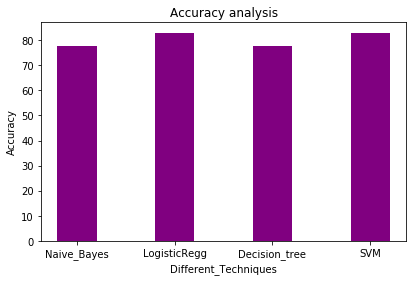

In [25]:
global str
#fig=plt.figure()
#ax=fig.add_axes([0,0,1,1])
x_axis=['Naive_Bayes','LogisticRegg','Decision_tree','SVM']
y_axis=[nb_acc*100,lr_acc*100,dt_acc*100,svm_acc*100]

plt.xlabel('Different_Techniques')
plt.ylabel('Accuracy')
plt.title('Accuracy analysis')
plt.tight_layout()

plt.bar(x_axis,y_axis,0.4,0,color='purple')
plt.show()

In [26]:

print("Accuracy of NB:",nb_acc)
print("Accuracy of LR:",lr_acc)
print("Accuracy of DT:",dt_acc)
print("Accuracy of SVM:",svm_acc)


Accuracy of NB: 0.7763157894736842
Accuracy of LR: 0.8289473684210527
Accuracy of DT: 0.7763157894736842
Accuracy of SVM: 0.8289473684210527


In [27]:
#print(‘knn: {}’.format(knn_best.score(X_test, y_test)))
#print(‘rf: {}’.format(rf_best.score(X_test, y_test)))
print("Classification: {}".format(Classification.score(X_test, Y_test)))

Classification: 0.8289473684210527


In [38]:
from sklearn.ensemble import VotingClassifier
estimators=[("CLassification", lr_acc), ("clf", dt_acc), ("clf2", svm_acc)]

In [39]:

ensemble = VotingClassifier(estimators, voting="hard")
xtrain=X_train
ytrain=Y_train

In [40]:
ensemble.fit(xtrain,ytrain)


TypeError: Cannot clone object '0.8289473684210527' (type <class 'numpy.float64'>): it does not seem to be a scikit-learn estimator as it does not implement a 'get_params' methods.

In [ ]:
ensemble.score(X_test, Y_test)
